# geoML package example

In this example we will see how to train a Gaussian Process model on the Walker Lake data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geoml

## Importing and preparing data

In [2]:
walker, walker_ex = geoml.data.Examples.walker()
print(walker)
print("\n\n")
print(walker_ex)

Object of class Points2D with 470 data locations

Data preview:

   ID      V      U  T
0   1    0.0 -999.0  2
1   2    0.0 -999.0  2
2   3  224.4 -999.0  2
3   4  434.4 -999.0  2
4   5  412.1 -999.0  2



Object of class Grid2D with 78000 data locations

Data preview:

     U    V
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0


## Training the model

Here we define the model's characteristics and do the training. For the covariance we chose two spherical structures. For the warping we scale the values, use the softplus function to keep the output positive and specify a monotonic spline for additional flexibility.

In [3]:
gp = geoml.models.GP(
    sp_data = walker, 
    variable = "V", 
    kernels = [
         # Each kernel object must specify a transform object to scale the data.
         # In this case we choose an isotropic transform. The number specified is the range,
         # but it will change after training.
         geoml.kernels.SphericalKernel(geoml.transform.Isotropic(5)),
         geoml.kernels.SphericalKernel(geoml.transform.Isotropic(10))],
    warping = [ 
         geoml.warping.Softplus(), 
         geoml.warping.Spline(5)])
print(gp.log_lik())
gp.train(max_iter = 2500, seed = 1234)

-3568.921378790606
Initializing population..................................................

Iteration: 833 | Best fitness: -3168.64358994602 | No improvement for 499/500.0 iterations          
Terminating training at iteration 833


These are the parameters the model learned:

In [4]:
print(gp)

A GP object

Covariance model: A CovarianceModelRegression object

Variance is free

Nugget: 0.03843122094515234

Position 0: variance = 0.9598377371457303

	Position [0][0]: SphericalKernel
		range: [107.08064109] (free)

Position 1: variance = 0.0017310419091173025

	Position [1][0]: SphericalKernel
		range: [75.14717687] (free)

Warping:

Position 0: Softplus

Position 1: Spline
	warp: [-0.5852  0.9414  0.634   0.889   0.3534] (free)
	original: [-3.   1.5  1.5  1.5  1.5] (fixed)



## Prediction and results

The `walker_ex` object already has coordinates defined on a grid, so we use it to make the prediction.

In [5]:
gp.predict(walker_ex, name="Vpred")
walker_ex

Processing batch 4 of 4       



Object of class Grid2D with 78000 data locations

Data preview:

     U    V  Vpred_mean      ...       Vpred_p0.5  Vpred_p0.75  Vpred_p0.975
0  0.0  0.0   -0.545964      ...        11.581969   140.157493    543.187594
1  0.0  0.0   -0.551602      ...        10.001582   134.721548    522.709310
2  0.0  0.0   -0.555017      ...         9.046141   130.151145    503.540868
3  0.0  0.0   -0.556157      ...         8.727561   126.472245    485.960555
4  0.0  0.0   -0.555675      ...         8.862153   123.472793    469.830853

[5 rows x 9 columns]

We use the matplotlib library to visualize the results.

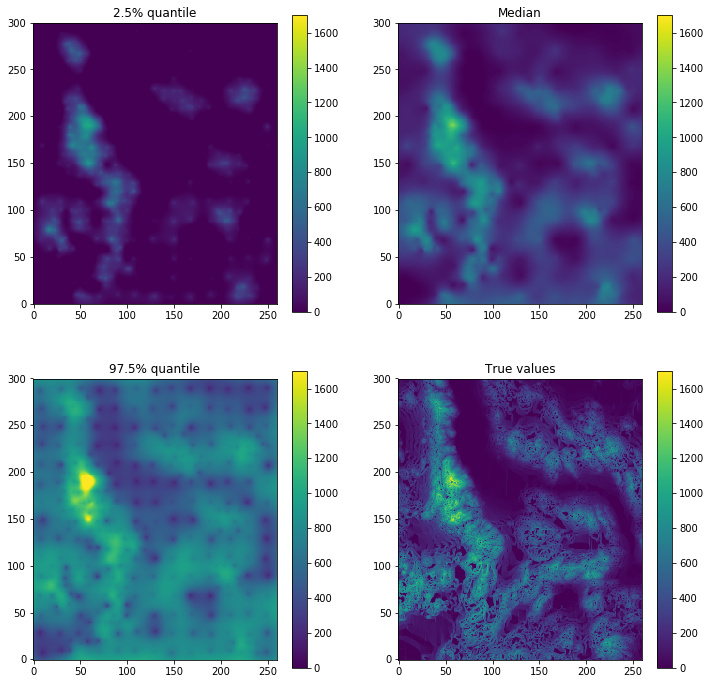

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.imshow(walker_ex.as_image("Vpred_p0.025"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("2.5% quantile")
plt.subplot(2, 2, 2)
plt.imshow(walker_ex.as_image("Vpred_p0.5"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("Median")
plt.subplot(2, 2, 3)
plt.imshow(walker_ex.as_image("Vpred_p0.975"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("97.5% quantile")
plt.subplot(2, 2, 4)
plt.imshow(walker_ex.as_image("V"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("True values")
plt.show()

## References

Rasmussen, C. E., & Williams, C. K. I. (2006). Gaussian processes for machine learning. Cambridge, Massachusetts: MIT Press. https://doi.org/10.1142/S0129065704001899

Snelson, E., Rasmussen, C. E., & Ghahramani, Z. (2004). Warped Gaussian processes. Adv Neural Inf Process Syst 16, 16, 337–344.

Isaaks, E. H., & Srivastava, R. M. (1989). Applied Geostatistics. New York, New York, USA: Oxford University.